In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model MUS_F_PNT begin
    @parameter begin
        g = 9.8
        M_Fr_wheel = 40
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "MUS_F_PNT") 
end



MUS_F_PNT (generic function with 1 method)

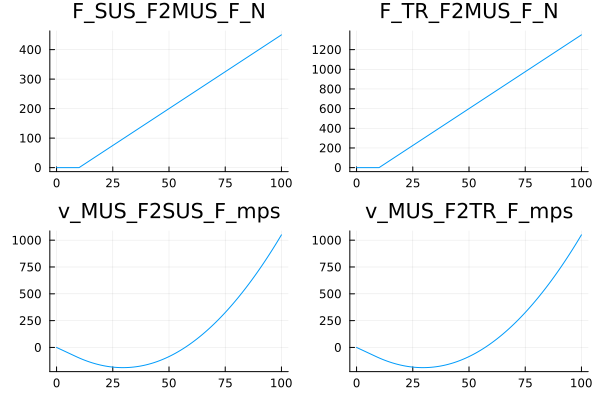

In [4]:
@model testblock begin
    @block begin
        b = MUS_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => b.F_SUS_F2MUS_F_N
        ramp2.out => b.F_TR_F2MUS_F_N
    end
    @scope begin
        b.F_SUS_F2MUS_F_N => F_SUS_F2MUS_F_N
        b.F_TR_F2MUS_F_N => F_TR_F2MUS_F_N 
        b.v_MUS_F2SUS_F_mps => v_MUS_F2SUS_F_mps
        b.v_MUS_F2TR_F_mps => v_MUS_F2TR_F_mps
    end
end
m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))